In [32]:
"""
splitcode, version 0.30.0

config for splitcode 
@extract <13Grr_umi[10]>8{linker2},<13Grr_bc[8]>{linker2},{linker2}<13Grr_bc[8]>{linker1},{linker1}<13Grr_bc[8]>,{linker1}8<13Grr_read>0:-1
@extract <~13Gr_umi[10]>8{linker2rc},<~13Gr_bc[8]>{linker2rc},{linker2rc}<~13Gr_bc[8]>{linker1rc},{linker1rc}<~13Gr_bc[8]>,{linker1rc}8<~13Gr_read>0:-1
@extract <13Gf_bc[8]>{linker1},{linker1}<13Gf_bc[8]>{linker2},{linker2}<13Gf_bc[8]>,{linker2}8<13Gf_umi[10]>,0:0<13Gf_read>14{linker1}
@extract <~13Gfrc_bc[8]>{linker1rc},{linker1rc}<~13Gfrc_bc[8]>{linker2rc},{linker2rc}<~13Gfrc_bc[8]>,{linker2rc}8<~13Gfrc_umi[10]>,0:0<~13Gfrc_read>14{linker1rc}
groups	ids	tags	distances	locations
group1	linker1rc	CCACAGTCTCAAGCACGTGGAT	3:3:3	0:0:0
group1	linker1	ATCCACGTGCTTGAGACTGTGG	3:3:3	0:0:
group2	linker2rc	AGTCGTACGCCGATGCGAAACATCGGCCAC	3:3:3	0:0:0
group2	linker2	GTGGCCGATGTTTCGCATCGGCGTACGACT	3:3:3	0:0:0

splitcode/build/src/splitcode -c config.txt igvfb01_13G-gc_lig-ss_11.fastq.gz -o igvfb01_13G_scmodified/igvfb01_13G_lig-ss.fastq.gz

cat 13Gumi.fastq.gz  13Gfumi.fastq.gz > 13G_umi.fastq.gz
cat 13Gbc.fastq.gz  13Gfbc.fastq.gz > 13G_bc.fastq.gz
cat 13Gread.fastq.gz  13Gfread.fastq.gz > 13G_read.fastq.gz

ref='ref/mm39'
tech='2,0,24:1,0,10:0,0,0'
#kb ref --kallisto ${path_to_lr_kallisto} -i ${ref}_k-63.idx -k 63 -f1 ${ref}.cdna.fa -g ${ref}.t2g ${ref}.fa.gz ${ref}.gtf.gz 
sample='13G_'
output='b01_nanopore_'${sample}'_sc_single_cell'

kallisto bus -x ${tech} --long -i ${ref}_k-63.idx -o ${output} -t 32 ${sample}read.fastq.gz ${sample}umi.fastq.gz ${sample}bc.fastq.gz

${path_to_bustools} sort -t 32 ${output}/output.bus \
 -o ${output}/sorted.bus; \
 ${path_to_bustools} whitelist --threshold 200 -o ${output}/whitelist.txt \
 ${output}/sorted.bus; \
 ${path_to_bustools} correct -w ${output}/whitelist.txt \
 -o ${output}/corrected.bus ${output}/sorted.bus; \ 
 ${path_to_bustools} capture -b -c ${output}/whitelist.txt \
 -o ${output}/captured.bus ${output}/corrected.bus; \
 ${path_to_bustools} count ${output}/captured.bus \
 -t ${output}/transcripts.txt \
 -e ${output}/matrix.ec \
 -o ${output}/count -m \
 -g ${ref}.t2g; \
 ${path_to_lr_kallisto} quant-tcc -t 32 \
 ${output}/count.mtx \
 -i ${ref}_k-63.idx \
 -f ${output}/flens.txt \
 -e ${output}/count.ec.txt \
 -o ${output};

 ${path_to_bustools} count ${output}/corrected.bus \
 -t ${output}/transcripts.txt \
 -e ${output}/matrix.ec \
 -o ${output}/gcount --em --genecounts \
 -g ${ref}.t2g;
"""

"\nsplitcode, version 0.30.0\n\nconfig for splitcode \n@extract <13Gumi[10]>8{{group2}},<13Gbc[8]>{{group2}},{{group2}}<13Gbc[8]>{{group1}},{{group1}}<13Gbc[8]>,{{group1}}8<13Gread>0:-1\n@extract <13Gfbc[8]>{{group1}},{{group1}}<13Gfbc[8]>,{{group2}}<13Gfbc[8]>,{{group2}}8<13Gfumi[10]>,0:0<13Gfread>14{{group1}}\ngroups\tids\ttags\tdistances\tlocations\ngroup1\tlinker1\tCCACAGTCTCAAGCACGTGGAT\t3:3:3\t0:0:0\ngroup1\tlinker1rc\tATCCACGTGCTTGAGACTGTGG\t3:3:3\t0:0:0\ngroup1\tlinker1r\tTAGGTGCACGAACTCTGACACC\t3:3:3\t0:0:0\ngroup1\tlinker1rcr\tGGTGTCAGAGTTCGTGCACCTA\t3:3:3\t0:0:0\ngroup2\tlinker2\tAGTCGTACGCCGATGCGAAACATCGGCCAC\t3:3:3\t0:0:0\ngroup2\tlinker2rc\tGTGGCCGATGTTTCGCATCGGCGTACGACT\t3:3:3\t0:0:0\ngroup2\tlinker2r\tCACCGGCTACAAAGCGTAGCCGCATGCTGA\t3:3:3\t0:0:0\ngroup2\tlinker2rcr\tTCAGCATGCGGCTACGCTTTGTAGCCGGTG\t3:3:3\t0:0:0\n\nsplitcode/build/src/splitcode -c config.txt igvfb01_13G-gc_lig-ss_11.fastq.gz -o igvfb01_13G_scmodified/igvfb01_13G_lig-ss.fastq.gz\n\ncat 13Gumi.fastq.gz  13G

In [33]:
# Import packages
import scipy
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.decomposition import TruncatedSVD
from scipy import sparse, io
import seaborn as sns

matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'


In [34]:

dir_IlluminaO = 'b01_next1_13G_single_cell_randO'
Oadata = sc.read_mtx(dir_IlluminaO+"/gcount.mtx")
Oadata.obs.index = pd.read_csv(dir_IlluminaO+"/gcount.barcodes.txt", header=None)[0].values
Oadata.var.index = pd.read_csv(dir_IlluminaO+"/gcount.genes.txt", header=None)[0].values

dir_IlluminaT = 'b01_next1_13G_single_cell_polyT'
Tadata = sc.read_mtx(dir_IlluminaT+"/gcount.mtx")
Tadata.obs.index = pd.read_csv(dir_IlluminaT+"/gcount.barcodes.txt", header=None)[0].values
Tadata.var.index = pd.read_csv(dir_IlluminaT+"/gcount.genes.txt", header=None)[0].values
'''
###Uncomment here to run ONT randO vs polyT comparison 

dir_ONTO = 'b01_nanopore_13G_sc_rt_randO_single_cell'
Oadata = sc.read_mtx(dir_IlluminaO+"/gcount.mtx")
Oadata.obs.index = pd.read_csv(dir_IlluminaO+"/gcount.barcodes.txt", header=None)[0].values
Oadata.var.index = pd.read_csv(dir_IlluminaO+"/gcount.genes.txt", header=None)[0].values

dir_ONTT = 'b01_nanopore_13G_sc_rt_polyT_single_cell'
Tadata = sc.read_mtx(dir_ONTT+"/gcount.mtx")
Tadata.obs.index = pd.read_csv(dir_ONTT+"/gcount.barcodes.txt", header=None)[0].values
Tadata.var.index = pd.read_csv(dir_ONTT+"/gcount.genes.txt", header=None)[0].values
'''

'\n\ndir_ONTO = \'b01_nanopore_13G_sc_rt_randO_single_cell\'\nOadata = sc.read_mtx(dir_IlluminaO+"/gcount.mtx")\nOadata.obs.index = pd.read_csv(dir_IlluminaO+"/gcount.barcodes.txt", header=None)[0].values\nOadata.var.index = pd.read_csv(dir_IlluminaO+"/gcount.genes.txt", header=None)[0].values\n\ndir_ONTT = \'b01_nanopore_13G_sc_rt_polyT_single_cell\'\nTadata = sc.read_mtx(dir_ONTT+"/gcount.mtx")\nTadata.obs.index = pd.read_csv(dir_ONTT+"/gcount.barcodes.txt", header=None)[0].values\nTadata.var.index = pd.read_csv(dir_ONTT+"/gcount.genes.txt", header=None)[0].values\n'

In [35]:
#Tadata.obs.index=[t[16:24]+t[8:16]+t[0:8] for t in Tadata.obs.index]
#Oadata.obs.index=[t[16:24]+t[8:16]+t[0:8] for t in Oadata.obs.index]

In [36]:
import os
barcodes_prefix_path = os.path.join(dir_IlluminaO+'/gcount.barcodes.txt')
# add barcode prefix
with open(barcodes_prefix_path) as f:
    print("opening")
    bc_prefix = f.read().splitlines()
Oadata.obs["barcode"] = Oadata.obs.index.values
Oadata.obs["libcode"] = bc_prefix
Oadata.obs["iden_bc"] = Oadata.obs.index.str[-8:]
Oadata.obs["barcode_idx"] = Oadata.obs["libcode"] + Oadata.obs["barcode"]
Oadata.obs.index = Oadata.obs["barcode_idx"]
# load in metadata
meta_path="plate01.txt"
metadata = pd.read_csv(meta_path,sep='\t', header=0)
# create well to barcode from metadata
wells_x_2 = list(metadata['well'])*2
sequence = list(metadata['t_bc']) + list(metadata['r_bc'])
barcode_type = ['T']*96 + ['R']*96
bc2well = pd.DataFrame({'well' : wells_x_2, 'sequence' : sequence, 'type' : barcode_type})
# add metadata to adata obs
Oadata.obs = Oadata.obs.merge(bc2well, left_on="iden_bc", right_on="sequence", how="left").set_index("barcode_idx", drop=False)
# add tissue, sex, strain metadata
# metadata_no_bc = metadata.drop([‘t_bc’,‘r_bc’],axis = 1)
Oadata.obs = Oadata.obs.merge(metadata,
                            left_on="well",
                            right_on="well",
                            how="left").set_index("barcode_idx", drop=False)
Oadata.obs["cell_identity"] = Oadata.obs.index.str[:-32] + '-' + Oadata.obs.well
Oadata.obs.index = Oadata.obs["cell_identity"]

opening


In [37]:
import os
barcodes_prefix_path = os.path.join(dir_IlluminaT+'/gcount.barcodes.txt')
# add barcode prefix
with open(barcodes_prefix_path) as f:
    print("opening")
    bc_prefix = f.read().splitlines()
Tadata.obs["barcode"] = Tadata.obs.index.values
Tadata.obs["libcode"] = bc_prefix
Tadata.obs["iden_bc"] = Tadata.obs.index.str[-8:]
Tadata.obs["barcode_idx"] = Tadata.obs["libcode"] + Tadata.obs["barcode"]
Tadata.obs.index = Tadata.obs["barcode_idx"]
# load in metadata
meta_path="plate01.txt"
metadata = pd.read_csv(meta_path,sep='\t', header=0)
# create well to barcode from metadata
wells_x_2 = list(metadata['well'])*2
sequence = list(metadata['t_bc']) + list(metadata['r_bc'])
barcode_type = ['T']*96 + ['R']*96
bc2well = pd.DataFrame({'well' : wells_x_2, 'sequence' : sequence, 'type' : barcode_type})
# add metadata to adata obs
Tadata.obs = Tadata.obs.merge(bc2well, left_on="iden_bc", right_on="sequence", how="left").set_index("barcode_idx", drop=False)
# add tissue, sex, strain metadata
# metadata_no_bc = metadata.drop([‘t_bc’,‘r_bc’],axis = 1)
Tadata.obs = Tadata.obs.merge(metadata,
                            left_on="well",
                            right_on="well",
                            how="left").set_index("barcode_idx", drop=False)
Tadata.obs["cell_identity"] = Tadata.obs.index.str[:-32] + '-' + Tadata.obs.well
Tadata.obs.index = Tadata.obs["cell_identity"]

opening


In [38]:
Oadata.var

""
ENSMUSG00000102693.2
ENSMUSG00000064842.3
ENSMUSG00000051951.6
ENSMUSG00000102851.2
ENSMUSG00000103377.2
...
ENSMUSG00000095366.3
ENSMUSG00000095134.3
ENSMUSG00000096768.9
ENSMUSG00000099871.2


In [39]:
Tadata.var

""
ENSMUSG00000102693.2
ENSMUSG00000064842.3
ENSMUSG00000051951.6
ENSMUSG00000102851.2
ENSMUSG00000103377.2
...
ENSMUSG00000095366.3
ENSMUSG00000095134.3
ENSMUSG00000096768.9
ENSMUSG00000099871.2


In [40]:
Tadata.obs

,barcode,libcode,iden_bc,barcode_idx,well,sequence,type,t_bc,r_bc,sex,rep,strain,sample,cell_identity
cell_identity,,,,,,,,,,,,,,
AAACATCGAACAACCA-B1,AAACATCGAACAACCAATTTGGCA,AAACATCGAACAACCAATTTGGCA,ATTTGGCA,AAACATCGAACAACCAATTTGGCAAAACATCGAACAACCAATTTGGCA,B1,ATTTGGCA,T,ATTTGGCA,TATGTGTC,F,1,NODShiLtJ,CortexHippocampus,AAACATCGAACAACCA-B1
AAACATCGAACTCACC-C2,AAACATCGAACTCACCTCATTGCA,AAACATCGAACTCACCTCATTGCA,TCATTGCA,AAACATCGAACTCACCTCATTGCAAAACATCGAACTCACCTCATTGCA,C2,TCATTGCA,T,TCATTGCA,TAGTTTCC,M,1,AJ,CortexHippocampus,AAACATCGAACTCACC-C2
AAACATCGAACTCACC-C9,AAACATCGAACTCACCTCTCATGC,AAACATCGAACTCACCTCTCATGC,TCTCATGC,AAACATCGAACTCACCTCTCATGCAAACATCGAACTCACCTCTCATGC,C9,TCTCATGC,T,TCTCATGC,CCATCTTG,F,1,AJ/PWKPhJ,Heart,AAACATCGAACTCACC-C9
AAACATCGAAGAGATC-C2,AAACATCGAAGAGATCTCATTGCA,AAACATCGAAGAGATCTCATTGCA,TCATTGCA,AAACATCGAAGAGATCTCATTGCAAAACATCGAAGAGATCTCATTGCA,C2,TCATTGCA,T,TCATTGCA,TAGTTTCC,M,1,AJ,CortexHippocampus,AAACATCGAAGAGATC-C2
AAACATCGAAGGACAC-A4,AAACATCGAAGGACACACATTTAC,AAACATCGAAGGACACACATTTAC,ACATTTAC,AAACATCGAAGGACACACATTTACAAACATCGAAGGACACACATTTAC,A4,ACATTTAC,T,ACATTTAC,GCTTATAG,M,2,C57BL6NJ,CortexHippocampus,AAACATCGAAGGACAC-A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCACGCATCTTCACA-D9,TTCACGCATCTTCACAGCTATCAT,TTCACGCATCTTCACAGCTATCAT,GCTATCAT,TTCACGCATCTTCACAGCTATCATTTCACGCATCTTCACAGCTATCAT,D9,GCTATCAT,T,GCTATCAT,GTGCTTGA,F,3,AJ/PWKPhJ,Heart,TTCACGCATCTTCACA-D9
TTCACGCATCTTCACA-B2,TTCACGCATCTTCACATTATTCTG,TTCACGCATCTTCACATTATTCTG,TTATTCTG,TTCACGCATCTTCACATTATTCTGTTCACGCATCTTCACATTATTCTG,B2,TTATTCTG,T,TTATTCTG,CAATTCTC,M,1,NODShiLtJ,CortexHippocampus,TTCACGCATCTTCACA-B2
TTCACGCATGAAGAGA-C10,TTCACGCATGAAGAGAATCCTTAC,TTCACGCATGAAGAGAATCCTTAC,ATCCTTAC,TTCACGCATGAAGAGAATCCTTACTTCACGCATGAAGAGAATCCTTAC,C10,ATCCTTAC,T,ATCCTTAC,TACTGTCT,M,1,AJ/PWKPhJ,Heart,TTCACGCATGAAGAGA-C10


In [41]:
Oadata.obs

,barcode,libcode,iden_bc,barcode_idx,well,sequence,type,t_bc,r_bc,sex,rep,strain,sample,cell_identity
cell_identity,,,,,,,,,,,,,,
AAACATCGAACAACCA-B1,AAACATCGAACAACCATATGTGTC,AAACATCGAACAACCATATGTGTC,TATGTGTC,AAACATCGAACAACCATATGTGTCAAACATCGAACAACCATATGTGTC,B1,TATGTGTC,R,ATTTGGCA,TATGTGTC,F,1,NODShiLtJ,CortexHippocampus,AAACATCGAACAACCA-B1
AAACATCGAACTCACC-C9,AAACATCGAACTCACCCCATCTTG,AAACATCGAACTCACCCCATCTTG,CCATCTTG,AAACATCGAACTCACCCCATCTTGAAACATCGAACTCACCCCATCTTG,C9,CCATCTTG,R,TCTCATGC,CCATCTTG,F,1,AJ/PWKPhJ,Heart,AAACATCGAACTCACC-C9
AAACATCGAACTCACC-C2,AAACATCGAACTCACCTAGTTTCC,AAACATCGAACTCACCTAGTTTCC,TAGTTTCC,AAACATCGAACTCACCTAGTTTCCAAACATCGAACTCACCTAGTTTCC,C2,TAGTTTCC,R,TCATTGCA,TAGTTTCC,M,1,AJ,CortexHippocampus,AAACATCGAACTCACC-C2
AAACATCGAAGAGATC-C2,AAACATCGAAGAGATCTAGTTTCC,AAACATCGAAGAGATCTAGTTTCC,TAGTTTCC,AAACATCGAAGAGATCTAGTTTCCAAACATCGAAGAGATCTAGTTTCC,C2,TAGTTTCC,R,TCATTGCA,TAGTTTCC,M,1,AJ,CortexHippocampus,AAACATCGAAGAGATC-C2
AAACATCGAAGGTACA-C1,AAACATCGAAGGTACAGCTATCTC,AAACATCGAAGGTACAGCTATCTC,GCTATCTC,AAACATCGAAGGTACAGCTATCTCAAACATCGAAGGTACAGCTATCTC,C1,GCTATCTC,R,CATGTCTC,GCTATCTC,F,1,AJ,CortexHippocampus,AAACATCGAAGGTACA-C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCACGCATCCGTCTA-B5,TTCACGCATCCGTCTAGCTGCATG,TTCACGCATCCGTCTAGCTGCATG,GCTGCATG,TTCACGCATCCGTCTAGCTGCATGTTCACGCATCCGTCTAGCTGCATG,B5,GCTGCATG,R,CCGTTCTA,GCTGCATG,F,3,NODShiLtJ,CortexHippocampus,TTCACGCATCCGTCTA-B5
TTCACGCATCCGTCTA-C11,TTCACGCATCCGTCTATTCATCGC,TTCACGCATCCGTCTATTCATCGC,TTCATCGC,TTCACGCATCCGTCTATTCATCGCTTCACGCATCCGTCTATTCATCGC,C11,TTCATCGC,R,TAAATATC,TTCATCGC,F,2,AJ/PWKPhJ,Heart,TTCACGCATCCGTCTA-C11
TTCACGCATCTTCACA-B2,TTCACGCATCTTCACACAATTCTC,TTCACGCATCTTCACACAATTCTC,CAATTCTC,TTCACGCATCTTCACACAATTCTCTTCACGCATCTTCACACAATTCTC,B2,CAATTCTC,R,TTATTCTG,CAATTCTC,M,1,NODShiLtJ,CortexHippocampus,TTCACGCATCTTCACA-B2


In [42]:
Tadata.obs.index

Index(['AAACATCGAACAACCA-B1', 'AAACATCGAACTCACC-C2', 'AAACATCGAACTCACC-C9',
       'AAACATCGAAGAGATC-C2', 'AAACATCGAAGGACAC-A4', 'AAACATCGAAGGTACA-C1',
       'AAACATCGAATCCGTC-B9', 'AAACATCGAATCCGTC-C7', 'AAACATCGAATCCGTC-A7',
       'AAACATCGAATCCGTC-C9',
       ...
       'TTCACGCAGTCTGTCA-B2', 'TTCACGCATAGGATGA-C10', 'TTCACGCATATCAGCA-B4',
       'TTCACGCATCCGTCTA-B5', 'TTCACGCATCCGTCTA-C11', 'TTCACGCATCTTCACA-D9',
       'TTCACGCATCTTCACA-B2', 'TTCACGCATGAAGAGA-C10', 'TTCACGCATGGTGGTA-A4',
       'TTCACGCATGGTGGTA-B6'],
      dtype='object', name='cell_identity', length=10641)

In [43]:
Oadata.obs.index

Index(['AAACATCGAACAACCA-B1', 'AAACATCGAACTCACC-C9', 'AAACATCGAACTCACC-C2',
       'AAACATCGAAGAGATC-C2', 'AAACATCGAAGGTACA-C1', 'AAACATCGAATCCGTC-C9',
       'AAACATCGAATCCGTC-C7', 'AAACATCGAATCCGTC-B9', 'AAACATCGAATGTTGC-A6',
       'AAACATCGACAAGCTA-D9',
       ...
       'TTCACGCAGGAGAACA-D2', 'TTCACGCAGGTGCGAA-D6', 'TTCACGCAGTGTTCTA-A9',
       'TTCACGCATAGGATGA-C10', 'TTCACGCATATCAGCA-B4', 'TTCACGCATCCGTCTA-B5',
       'TTCACGCATCCGTCTA-C11', 'TTCACGCATCTTCACA-B2', 'TTCACGCATCTTCACA-D9',
       'TTCACGCATGAAGAGA-C10'],
      dtype='object', name='cell_identity', length=11063)

In [44]:
#adata.obs_names_make_unique()
#sc.pp.filter_genes(adata, min_cells=100, inplace=True)
sc.pp.calculate_qc_metrics(Oadata, inplace=True)
#sc.pp.filter_cells(adata, min_genes=200, inplace=True)#min_genes=300) 
sc.pp.filter_cells(Oadata, min_counts=500, inplace=True)#min_genes=300) 
#adata = adata[:, adata.var["n_counts"]]
sc.pp.filter_genes(Oadata, min_cells=100, inplace=True)
#adata = adata[:, adata.var["n_cells"]]
#Iadata.obs_names_make_unique()
sc.pp.calculate_qc_metrics(Tadata, inplace=True)
#sc.pp.filter_cells(Iadata, min_genes=200, inplace=True)#min_genes=300) 
#sc.pp.filter_genes(Iadata, min_cells=100, inplace=True)
sc.pp.filter_cells(Tadata, min_counts=500, inplace=True)#min_genes=300) 
#Iadata = Iadata[:, Iadata.var["n_counts"]]
sc.pp.filter_genes(Tadata, min_cells=100, inplace=True)
#Iadata = Iadata[:, Iadata.var["n_cells"]]

In [45]:
Oadata

AnnData object with n_obs × n_vars = 10027 × 10499
    obs: 'barcode', 'libcode', 'iden_bc', 'barcode_idx', 'well', 'sequence', 'type', 't_bc', 'r_bc', 'sex', 'rep', 'strain', 'sample', 'cell_identity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [46]:
Tadata

AnnData object with n_obs × n_vars = 9344 × 9224
    obs: 'barcode', 'libcode', 'iden_bc', 'barcode_idx', 'well', 'sequence', 'type', 't_bc', 'r_bc', 'sex', 'rep', 'strain', 'sample', 'cell_identity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

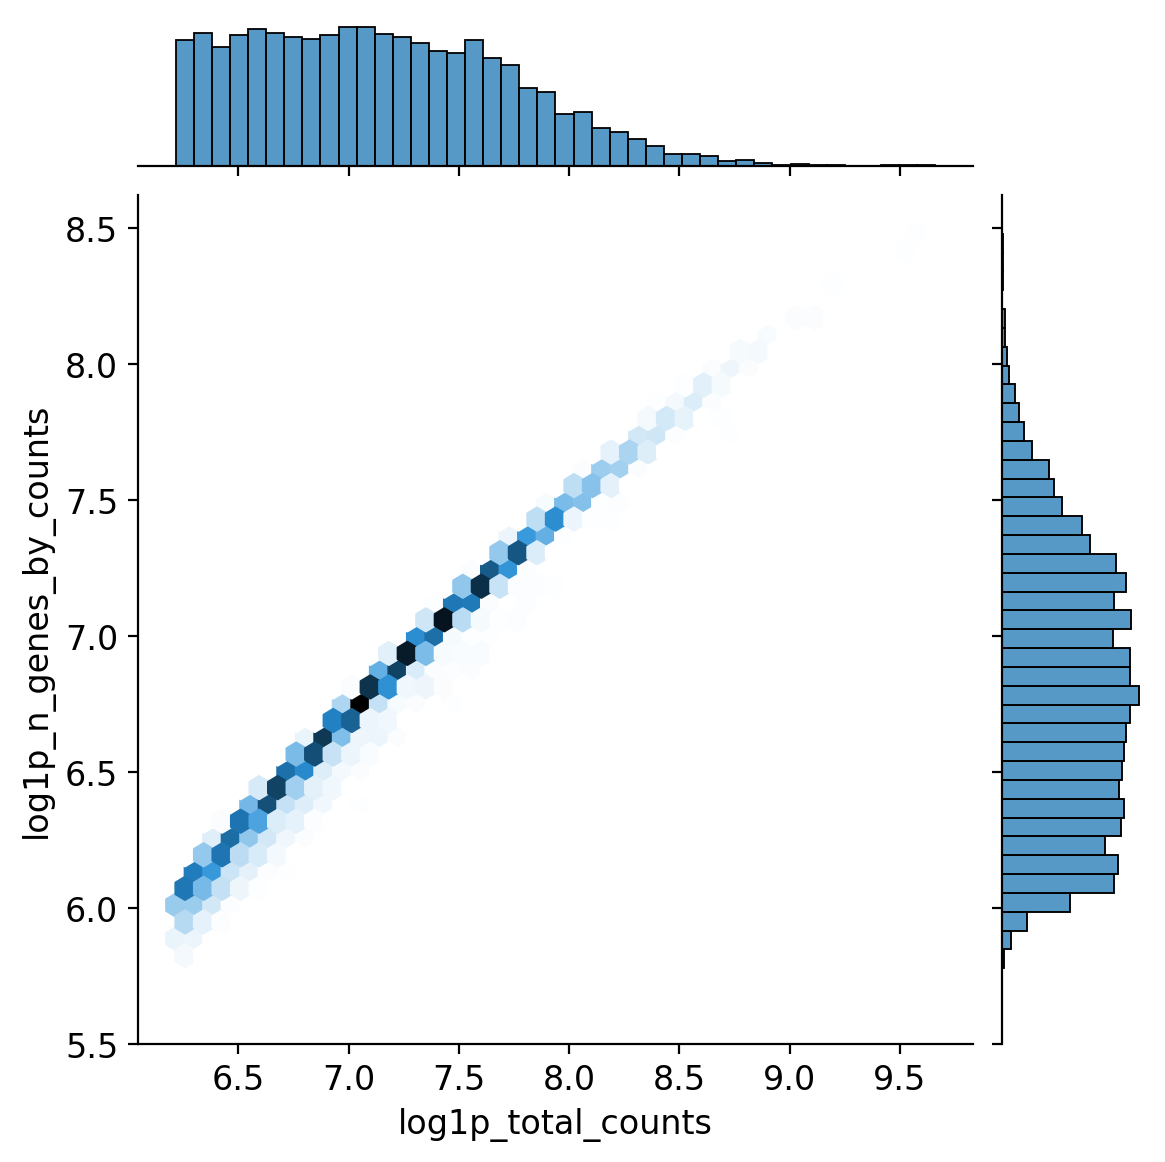

In [47]:
sns.jointplot(
    data=Oadata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

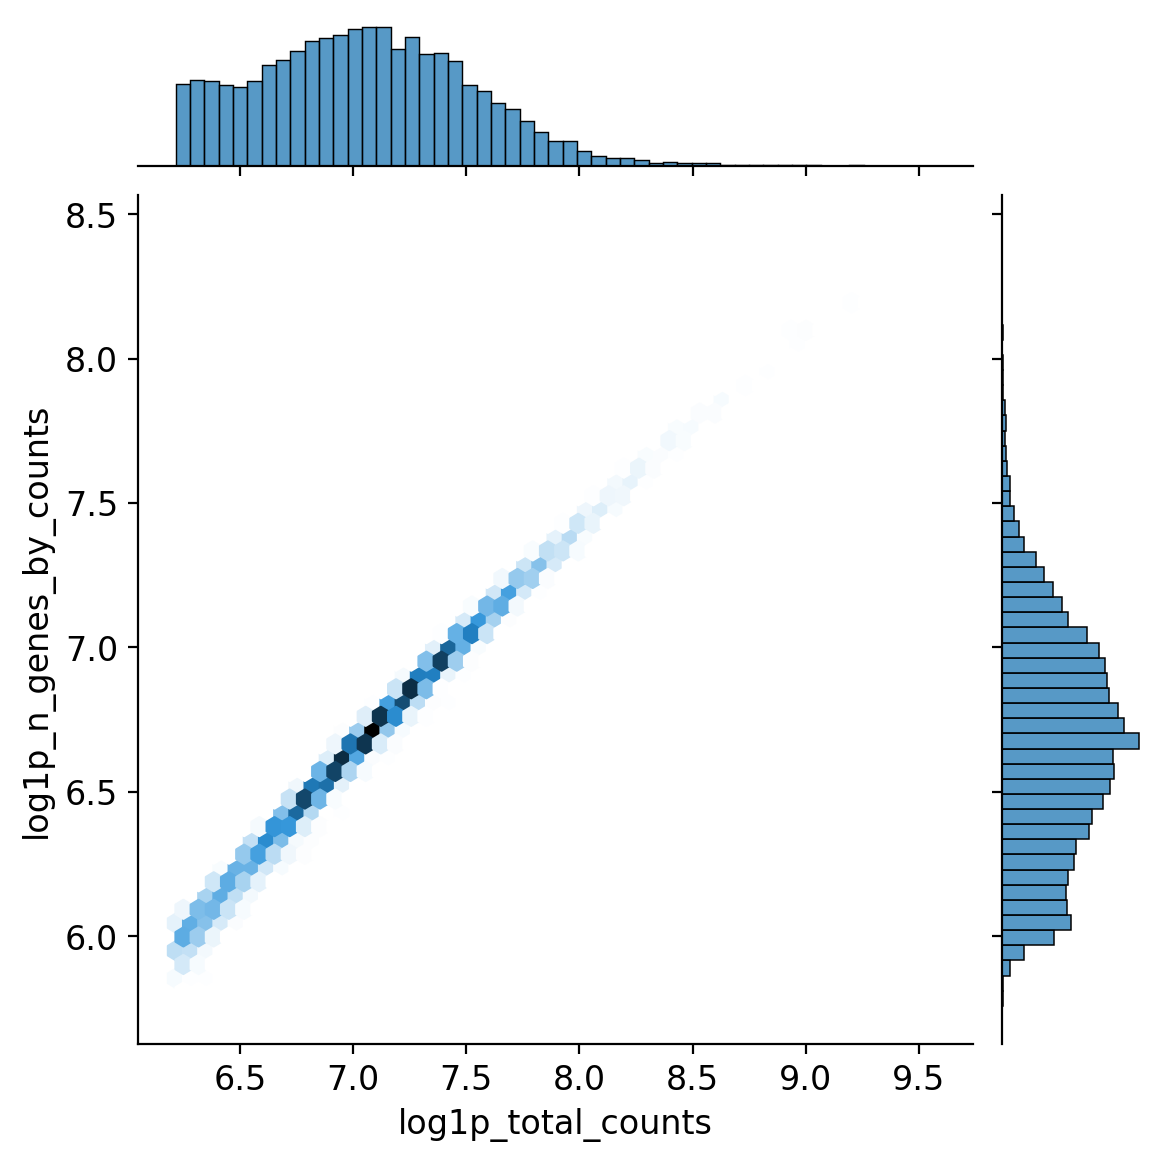

In [48]:
sns.jointplot(
    data=Tadata.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

In [49]:
#adata.obs_names_make_unique()
sc.pp.normalize_per_cell(Oadata, counts_per_cell_after=1e4)
sc.pp.log1p(Oadata)

#Iadata.obs_names_make_unique()
sc.pp.normalize_per_cell(Tadata, counts_per_cell_after=1e4)
sc.pp.log1p(Tadata)

In [50]:
intersect = [t for t in Oadata.obs["cell_identity"] if t in Tadata.obs["cell_identity"]]

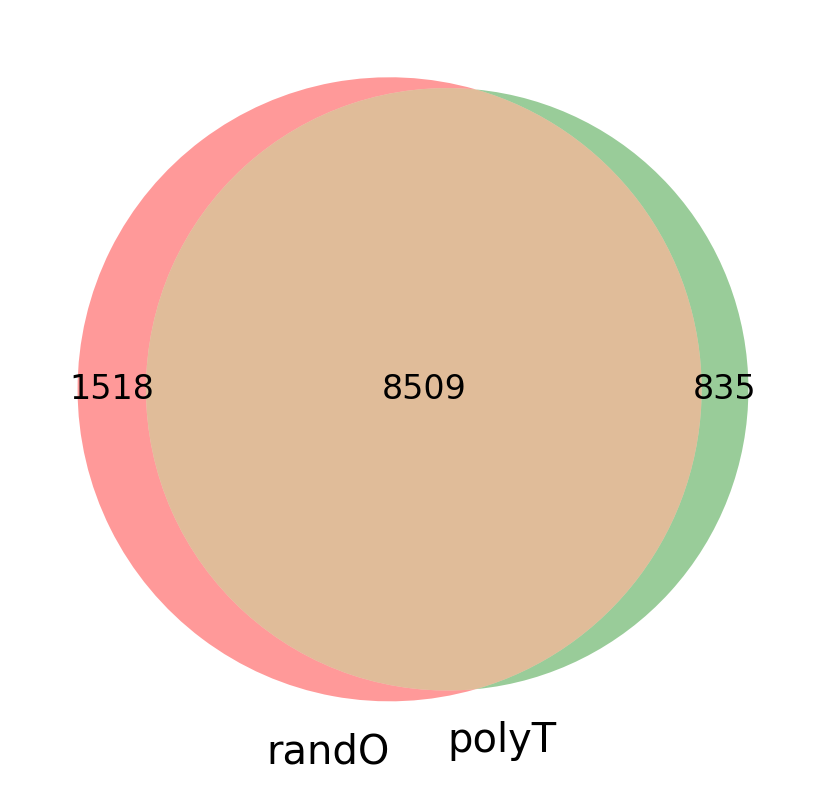

In [51]:
#!pip install matplotlib-venn
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

tadata = [t for t in Tadata.obs["cell_identity"]]
oadata = [o for o in Oadata.obs["cell_identity"]]

venn2((set(oadata), set(tadata)), ('randO', 'polyT'))


In [52]:
intersect_g = [gene for gene in Oadata.var.index if gene in Tadata.var.index]

In [53]:
intersect = set(tadata) & set(oadata)
print(len(intersect))
print(len(intersect_g))

8509
8492


In [54]:
Tadata.var.index

Index(['ENSMUSG00000051951.6', 'ENSMUSG00000103161.2', 'ENSMUSG00000033845.14',
       'ENSMUSG00000025903.15', 'ENSMUSG00000033813.16',
       'ENSMUSG00000002459.18', 'ENSMUSG00000033793.13',
       'ENSMUSG00000025905.15', 'ENSMUSG00000025907.15',
       'ENSMUSG00000033740.18',
       ...
       'ENSMUSG00000049775.17', 'ENSMUSG00000049176.17',
       'ENSMUSG00000031358.18', 'ENSMUSG00000031355.17',
       'ENSMUSG00000035299.17', 'ENSMUSG00000056673.15',
       'ENSMUSG00000069049.12', 'ENSMUSG00000068457.15',
       'ENSMUSG00000069045.12', 'ENSMUSG00000096768.9'],
      dtype='object', length=9224)

In [55]:
pearson_gene_O_vs_T = []
for c in intersect:
    if np.squeeze(np.asarray(Oadata[c, intersect_g].X.todense())).all() != 1:
        pearson=scipy.stats.pearsonr(np.squeeze(np.asarray(Oadata[c, intersect_g].X.todense())), np.squeeze(np.asarray(Tadata[c, intersect_g].X.todense())))
        pearson_gene_O_vs_T.append(pearson[0])

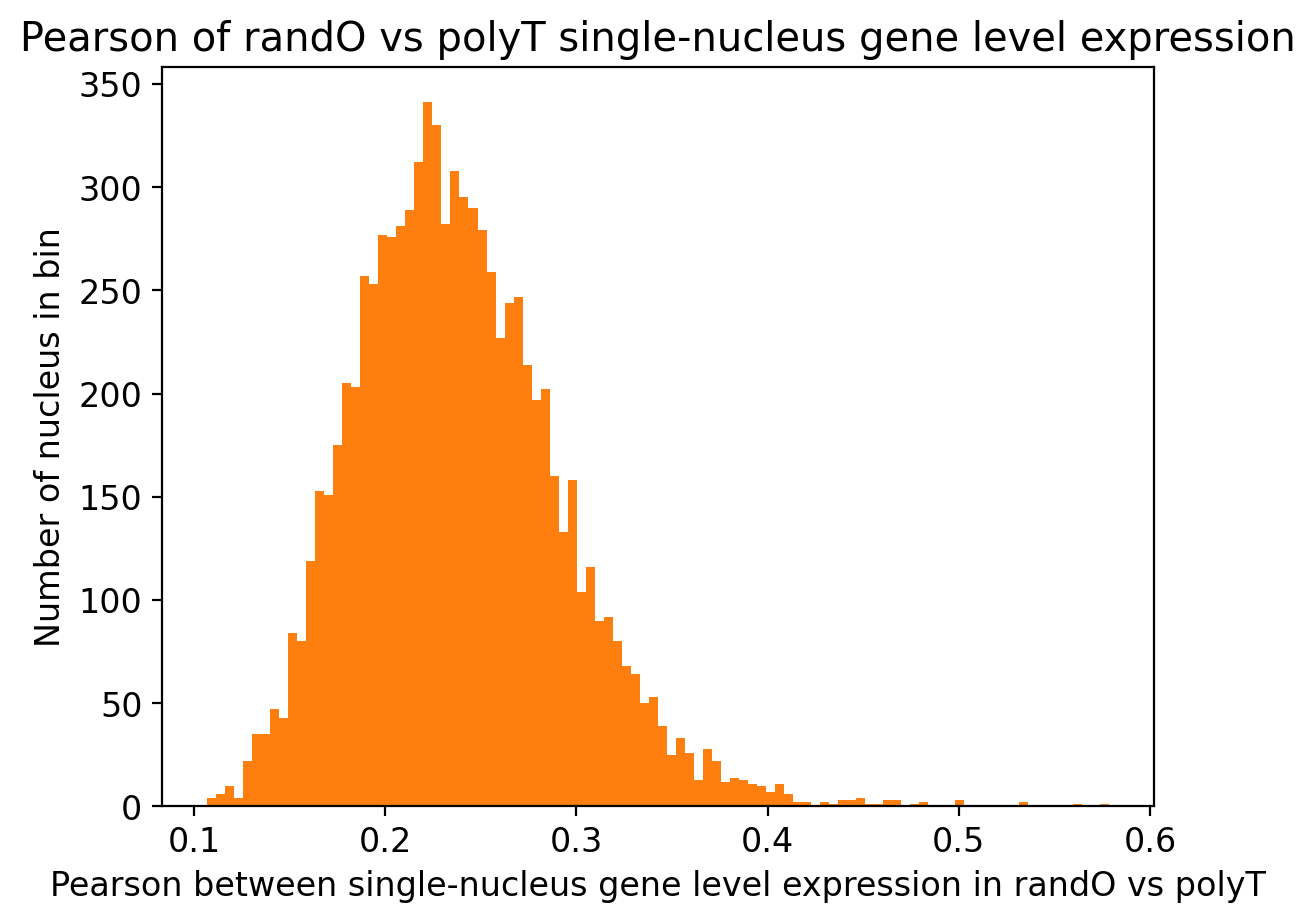

8509

In [56]:
import matplotlib.pyplot as plt

plt.hist(pearson_gene_O_vs_T, bins=100, color='C1')
plt.xlabel("Pearson between single-nucleus gene level expression in randO vs polyT")
plt.ylabel("Number of nucleus in bin")
plt.title("Pearson of randO vs polyT single-nucleus gene level expression")
plt.show()
len(pearson_gene_O_vs_T)

In [57]:
#Iadata.obs_names_make_unique(join='-')
spearman_gene_O_vs_T = []
for c in intersect:
    if np.squeeze(np.asarray(Oadata[c, intersect_g].X.todense())).all() != 1:
        spearman=scipy.stats.spearmanr(np.squeeze(np.asarray(Oadata[c, intersect_g].X.todense())), np.squeeze(np.asarray(Tadata[c, intersect_g].X.todense())))
        spearman_gene_O_vs_T.append(spearman[0])

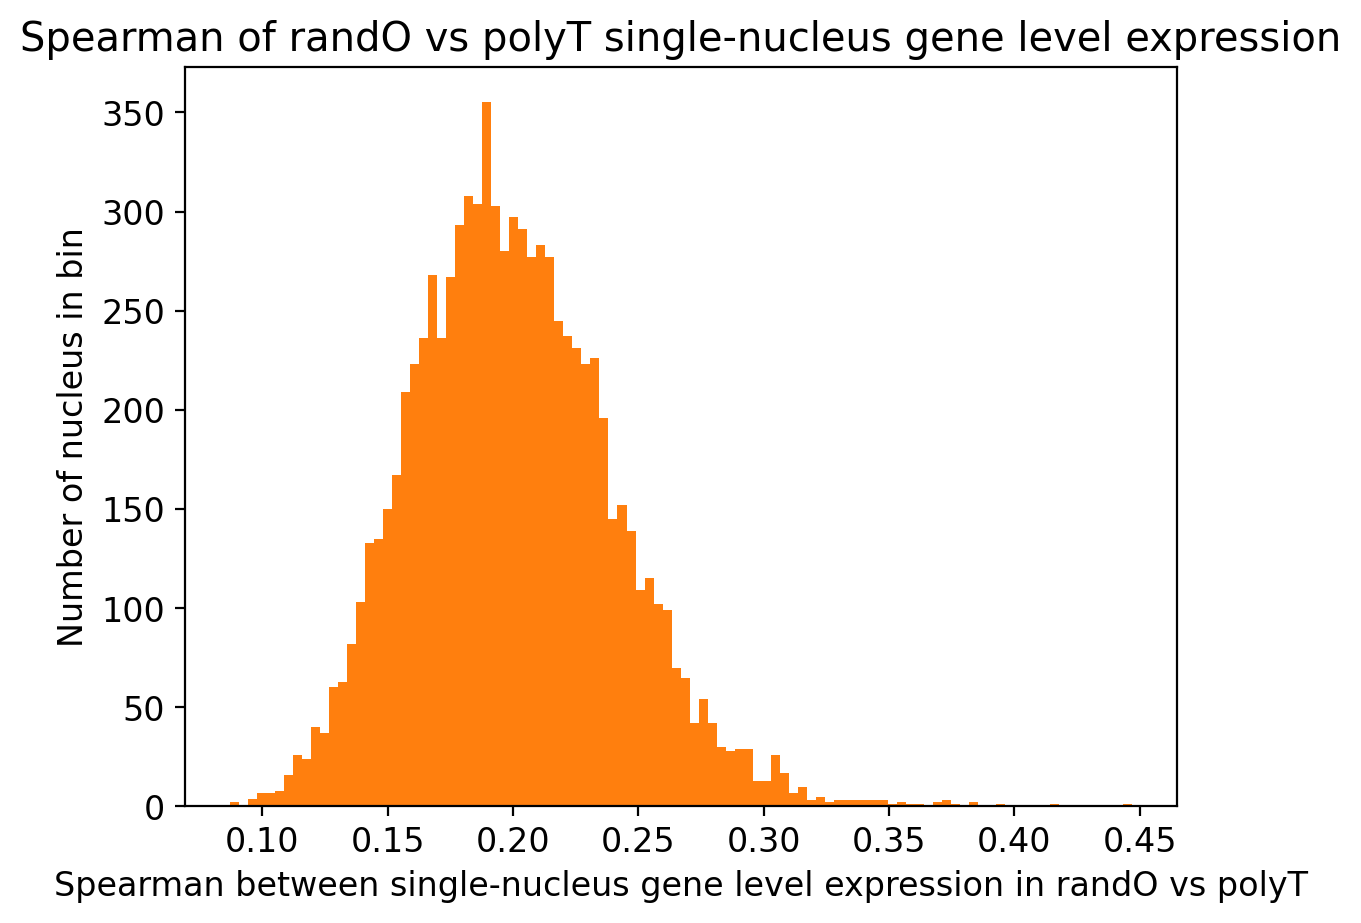

8509

In [58]:
import matplotlib.pyplot as plt

plt.hist(spearman_gene_O_vs_T, bins=100, color='C1')
plt.xlabel("Spearman between single-nucleus gene level expression in randO vs polyT")
plt.ylabel("Number of nucleus in bin")
plt.title("Spearman of randO vs polyT single-nucleus gene level expression")
plt.show()
len(spearman_gene_O_vs_T)

/tmp/ipykernel_22072/2695987418.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hexbin(Oadata.obs['n_counts'][intersect], spearman_gene_O_vs_T, gridsize=50, cmap='jet', bins='log')


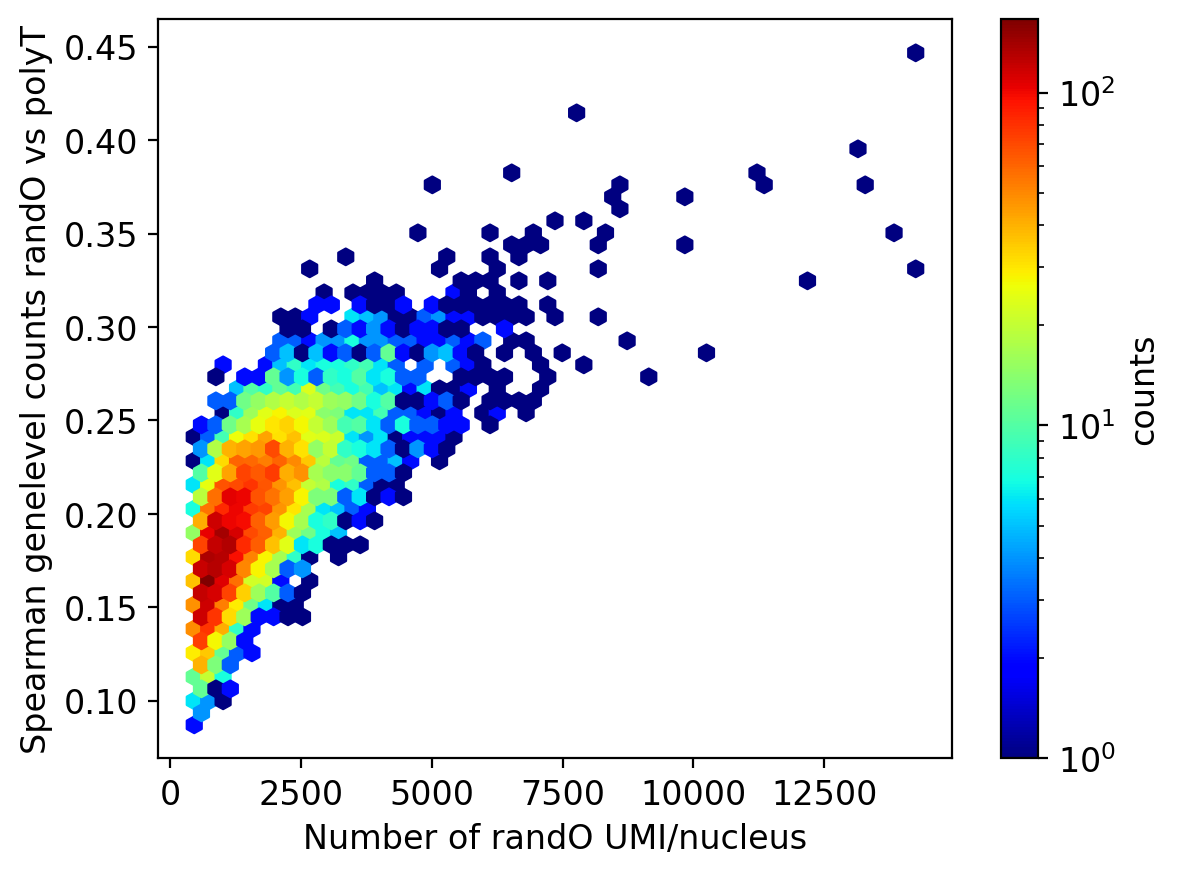

In [59]:
#plt.scatter(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill)
plt.hexbin(Oadata.obs['n_counts'][intersect], spearman_gene_O_vs_T, gridsize=50, cmap='jet', bins='log')
plt.ylabel("Spearman genelevel counts randO vs polyT")
plt.xlabel("Number of randO UMI/nucleus")
plt.colorbar(label='counts')
plt.show()

/tmp/ipykernel_22072/4243745248.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hexbin(Tadata.obs['n_counts'][intersect], spearman_gene_O_vs_T, gridsize=50, cmap='jet', bins='log')


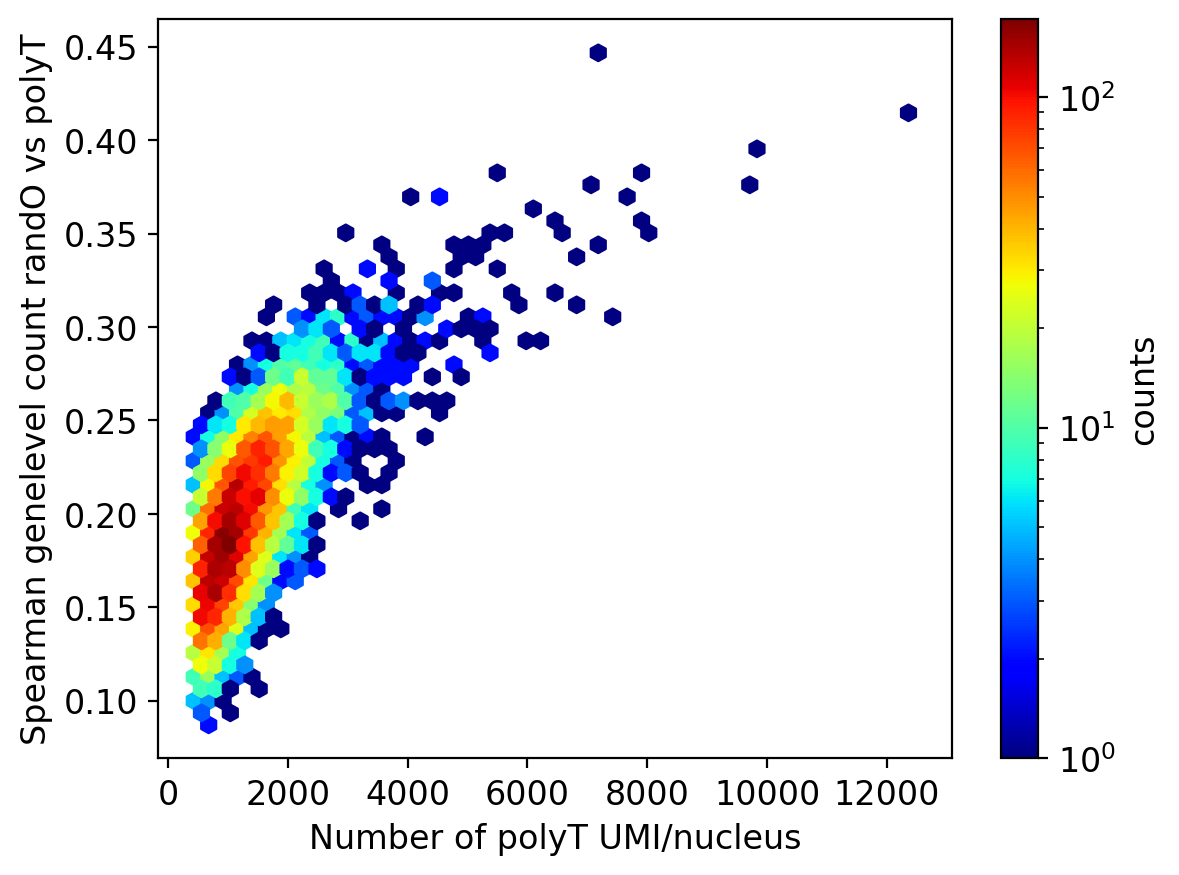

In [60]:
#plt.scatter(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill)
plt.hexbin(Tadata.obs['n_counts'][intersect], spearman_gene_O_vs_T, gridsize=50, cmap='jet', bins='log')
plt.ylabel("Spearman genelevel count randO vs polyT")
plt.xlabel("Number of polyT UMI/nucleus")
plt.colorbar(label='counts')
plt.show()

/tmp/ipykernel_22072/1117531585.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hexbin(Oadata.obs['n_counts'][intersect], Tadata.obs['n_counts'][intersect], gridsize=50, cmap='jet', bins='log')
/tmp/ipykernel_22072/1117531585.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  plt.hexbin(Oadata.obs['n_counts'][intersect], Tadata.obs['n_counts'][intersect], gridsize=50, cmap='jet', bins='log')


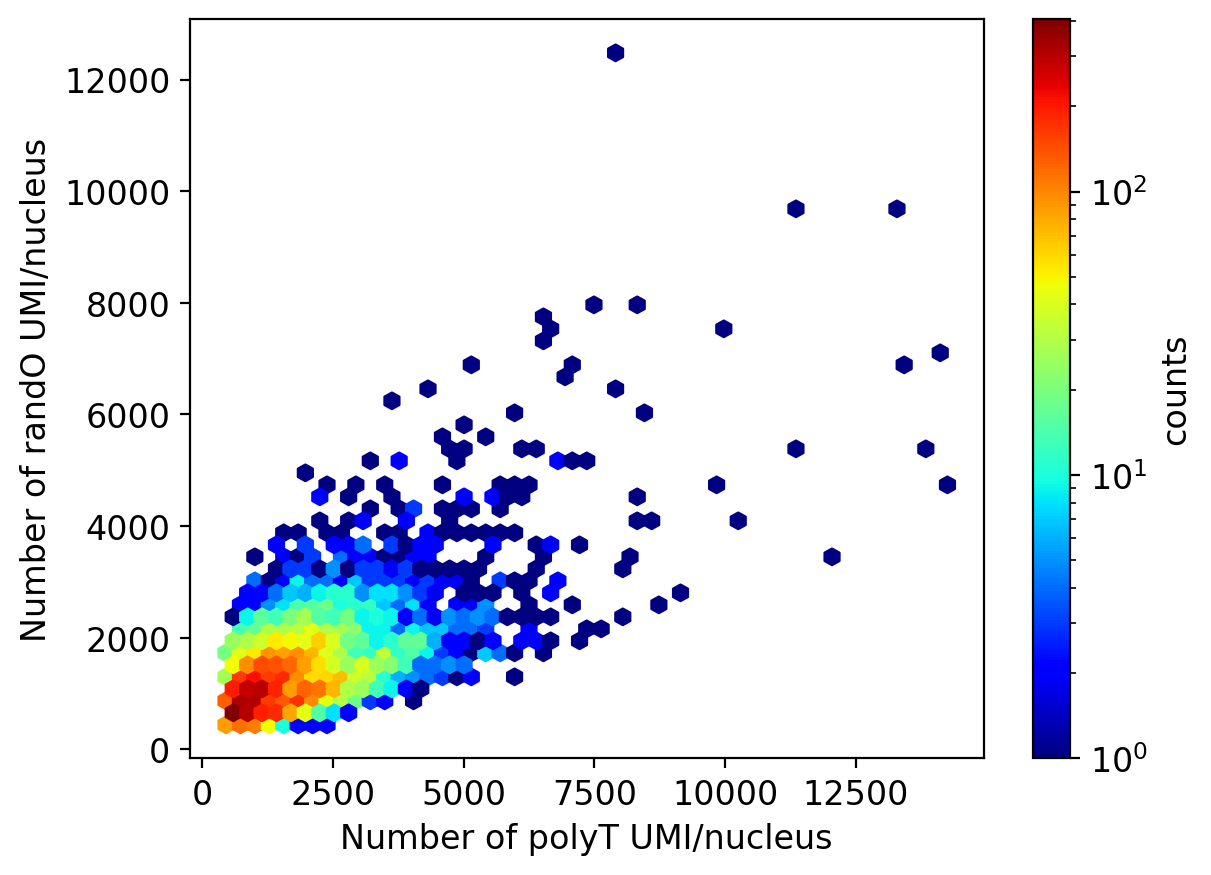

In [61]:
#plt.scatter(adata.obs['n_counts'], spearman_gene_ONT_vs_Ill)
plt.hexbin(Oadata.obs['n_counts'][intersect], Tadata.obs['n_counts'][intersect], gridsize=50, cmap='jet', bins='log')
plt.ylabel("Number of randO UMI/nucleus")
plt.xlabel("Number of polyT UMI/nucleus")
plt.colorbar(label='counts')
plt.show()

In [62]:
Oadata.obs.index

Index(['AAACATCGAACAACCA-B1', 'AAACATCGAACTCACC-C9', 'AAACATCGAACTCACC-C2',
       'AAACATCGAAGAGATC-C2', 'AAACATCGAAGGTACA-C1', 'AAACATCGAATCCGTC-C9',
       'AAACATCGAATCCGTC-C7', 'AAACATCGAATCCGTC-B9', 'AAACATCGAATGTTGC-A6',
       'AAACATCGACAAGCTA-D9',
       ...
       'TTCACGCAGCTAACGA-C6', 'TTCACGCAGGAGAACA-D2', 'TTCACGCAGGTGCGAA-D6',
       'TTCACGCATAGGATGA-C10', 'TTCACGCATATCAGCA-B4', 'TTCACGCATCCGTCTA-B5',
       'TTCACGCATCCGTCTA-C11', 'TTCACGCATCTTCACA-B2', 'TTCACGCATCTTCACA-D9',
       'TTCACGCATGAAGAGA-C10'],
      dtype='object', name='cell_identity', length=10027)